In [80]:
import pandas as pd
import numpy as np
from IPython.display import display, Math, Latex
!pip install statsmodels
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
%matplotlib inline
import scipy
import scipy.stats as stats

In [81]:
df = pd.read_csv("../resources/data/credit_card_clients.csv", header=0)
#https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [82]:

df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [83]:
#reset the column headers
df.columns = df.iloc[0]
df = df[1:]

In [84]:
df.dtypes

0
ID                            object
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

Please use the above dataset to build a linear regression model to predict if an individual will default on their next months payment. Note that the last column 'default payment next month' is the label with 1 being paid 0 being not paid. More details of the dataset can be found here https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients.

You must get greater than 80% accuracy in order to pass.

In [85]:
df.isnull().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [86]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
ID                            30000 non-null object
LIMIT_BAL                     30000 non-null object
SEX                           30000 non-null object
EDUCATION                     30000 non-null object
MARRIAGE                      30000 non-null object
AGE                           30000 non-null object
PAY_0                         30000 non-null object
PAY_2                         30000 non-null object
PAY_3                         30000 non-null object
PAY_4                         30000 non-null object
PAY_5                         30000 non-null object
PAY_6                         30000 non-null object
BILL_AMT1                     30000 non-null object
BILL_AMT2                     30000 non-null object
BILL_AMT3                     30000 non-null object
BILL_AMT4                     30000 non-null object
BILL_AMT5                     30000 non-null object
BILL_AM

In [87]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,8065,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [88]:
col_list = list(df.columns.values)
for x in col_list:
    df[x] = pd.to_numeric(df[x], errors='coerce')

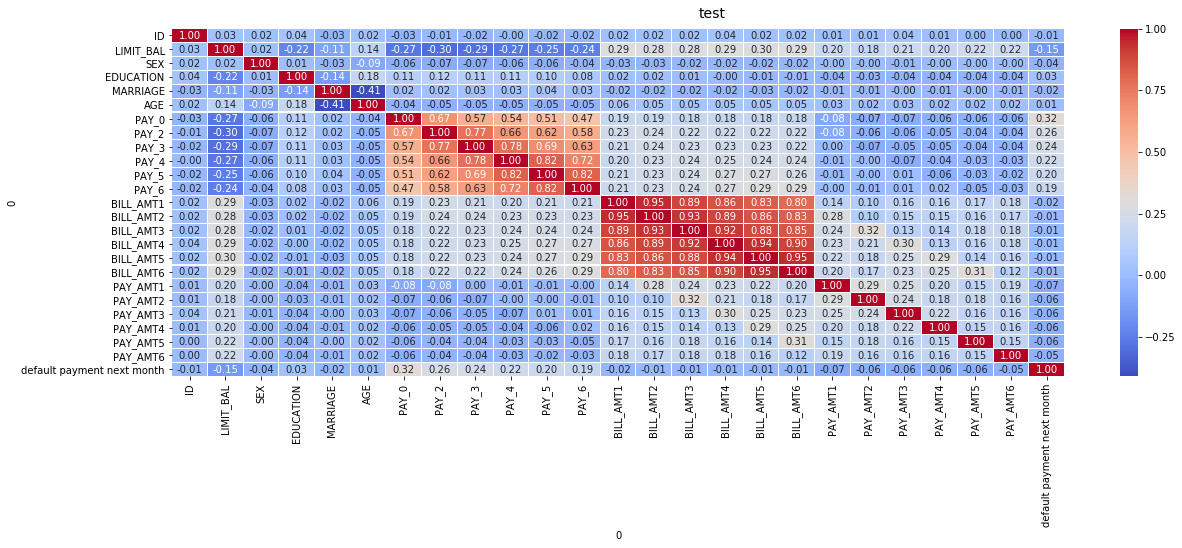

In [89]:
f, ax = plt.subplots(figsize=(20, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('test', fontsize=14)

In [90]:
x = pd.DataFrame(np.c_[df['PAY_0'], df['PAY_2'], df['PAY_3'], df['PAY_4'], df['PAY_5'], df['PAY_6']], columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4','PAY_5','PAY_6'])
y = df['default payment next month']

In [91]:
from sklearn.model_selection import train_test_split

#split data into 70% training and 30% test set
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3) 

In [92]:
from sklearn.preprocessing import StandardScaler
stsc = StandardScaler()
stsc.fit_transform(X_train)
stsc.fit_transform(X_test)

C:\Users\tholl\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\tholl\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\tholl\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\tholl\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.76647142, -0.71938785, -0.69678852, -0.67437224, -0.65011583,
        -0.61169822],
       [ 0.01082648,  0.11110095,  0.1362477 ,  0.18494394,  0.23734701,
         0.26021879],
       [ 0.01082648,  0.11110095, -0.69678852, -0.67437224, -0.65011583,
        -0.61169822],
       ...,
       [-0.86699599,  0.11110095,  0.1362477 ,  1.90357631,  2.89973553,
         2.0040528 ],
       [ 1.76647142,  0.11110095,  0.1362477 ,  0.18494394,  0.23734701,
         0.26021879],
       [ 0.88864895, -1.54987665, -0.69678852, -0.67437224, -1.53757867,
        -1.48361523]])

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
clf = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train)

In [95]:
clf.predict_proba(X_test)

array([[0.58936374, 0.41063626],
       [0.79705824, 0.20294176],
       [0.81450695, 0.18549305],
       ...,
       [0.86756527, 0.13243473],
       [0.53681945, 0.46318055],
       [0.75361752, 0.24638248]])

In [96]:
clf.score(X_test, y_test)

0.8131111111111111